<h1>Australian market analysis and model building for Surprise Housing</h1>
<hr/>
<h2>Business Objective(s)</h2>

**The company wants to know:**
  - Which variables are significant in predicting the price of a house, and
  - How well those variables describe the price of a house.

**Technical goal**
  - Determine the optimal value of lambda for ridge and lasso regression

<h3>Business Goal</h3>
    You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
<h2>Libraries Imports</h2>

<h3>Notebook settings</h3>

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from enum import Enum, auto
from typing import Sequence, Tuple
from pandas_profiling.profile_report import  ProfileReport
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# plotting 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# render matplotlib graphs inline
%matplotlib inline

# import display function
from IPython.display import display

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


<h3>Pandas settings</h3>

In [2]:
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3


<h4>Load Data</h4>

In [3]:
df = pd.read_csv("train.csv")

<h3>Data peak</h3>

In [4]:
# head
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T


count        mean        std      min        25%       50%  \
Id             1460.0     730.500    421.610      1.0     365.75     730.5   
MSSubClass     1460.0      56.897     42.301     20.0      20.00      50.0   
LotFrontage    1201.0      70.050     24.285     21.0      59.00      69.0   
LotArea        1460.0   10516.828   9981.265   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.099      1.383      1.0       5.00       6.0   
OverallCond    1460.0       5.575      1.113      1.0       5.00       5.0   
YearBuilt      1460.0    1971.268     30.203   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.866     20.645   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.685    181.066      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.640    456.098      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.549    161.319      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0     223.00     477.5   
TotalBsmtSF    1460.0    1057.429    438.705      0.0     795.75     991.5   
1stFlrSF       1460.0    1162.627    386.588    334.0     882.00    1087.0   
2ndFlrSF       1460.0     346.992    436.528      0.0       0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0       0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    1129.50    1464.0   
BsmtFullBath   1460.0       0.425      0.519      0.0       0.00       0.0   
BsmtHalfBath   1460.0       0.058      0.239      0.0       0.00       0.0   
FullBath       1460.0       1.565      0.551      0.0       1.00       2.0   
HalfBath       1460.0       0.383      0.503      0.0       0.00       0.0   
BedroomAbvGr   1460.0       2.866      0.816      0.0       2.00       3.0   
KitchenAbvGr   1460.0       1.047      0.220      0.0       1.00       1.0   
TotRmsAbvGrd   1460.0       6.518      1.625      2.0       5.00       6.0   
Fireplaces     1460.0       0.613      0.645      0.0       0.00       1.0   
GarageYrBlt    1379.0    1978.506     24.690   1900.0    1961.00    1980.0   
GarageCars     1460.0       1.767      0.747      0.0       1.00       2.0   
GarageArea     1460.0     472.980    213.805      0.0     334.50     480.0   
WoodDeckSF     1460.0      94.245    125.339      0.0       0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0       0.00      25.0   
EnclosedPorch  1460.0      21.954     61.119      0.0       0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0       0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0       0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0       0.00       0.0   
MiscVal        1460.0      43.489    496.123      0.0       0.00       0.0   
MoSold         1460.0       6.322      2.704      1.0       5.00       6.0   
YrSold         1460.0    2007.816      1.328   2006.0    2007.00    2008.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  129975.00  163000.0   

                     75%       max  
Id               1095.25    1460.0  
MSSubClass         70.00     190.0  
LotFrontage        80.00     313.0  
LotArea         11601.50  215245.0  
OverallQual         7.00      10.0  
OverallCond         6.00       9.0  
YearBuilt        2000.00    2010.0  
YearRemodAdd     2004.00    2010.0  
MasVnrArea        166.00    1600.0  
BsmtFinSF1        712.25    5644.0  
BsmtFinSF2          0.00    1474.0  
BsmtUnfSF         808.00    2336.0  
TotalBsmtSF      1298.25    6110.0  
1stFlrSF         1391.25    4692.0  
2ndFlrSF          728.00    2065.0  
LowQualFinSF        0.00     572.0  
GrLivArea        1776.75    5642.0  
BsmtFullBath        1.00       3.0  
BsmtHalfBath        0.00       2.0  
FullBath            2.00       3.0  
HalfBath            1.00       2.0  
BedroomAbvGr        3.00       8.0  
KitchenAbvGr        1.00       3.0  
TotRmsAbvGrd        7.00      14.0  
Fireplaces          1.00       3.0  
GarageYrBlt

In [7]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99]).T


count        mean        std      min        5%       10%  \
Id             1460.0     730.500    421.610      1.0     73.95     146.9   
MSSubClass     1460.0      56.897     42.301     20.0     20.00      20.0   
LotFrontage    1201.0      70.050     24.285     21.0     34.00      44.0   
LotArea        1460.0   10516.828   9981.265   1300.0   3311.70    5000.0   
OverallQual    1460.0       6.099      1.383      1.0      4.00       5.0   
OverallCond    1460.0       5.575      1.113      1.0      4.00       5.0   
YearBuilt      1460.0    1971.268     30.203   1872.0   1916.00    1924.9   
YearRemodAdd   1460.0    1984.866     20.645   1950.0   1950.00    1950.0   
MasVnrArea     1452.0     103.685    181.066      0.0      0.00       0.0   
BsmtFinSF1     1460.0     443.640    456.098      0.0      0.00       0.0   
BsmtFinSF2     1460.0      46.549    161.319      0.0      0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0      0.00      74.9   
TotalBsmtSF    1460.0    1057.429    438.705      0.0    519.30     636.9   
1stFlrSF       1460.0    1162.627    386.588    334.0    672.95     756.9   
2ndFlrSF       1460.0     346.992    436.528      0.0      0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0      0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    848.00     912.0   
BsmtFullBath   1460.0       0.425      0.519      0.0      0.00       0.0   
BsmtHalfBath   1460.0       0.058      0.239      0.0      0.00       0.0   
FullBath       1460.0       1.565      0.551      0.0      1.00       1.0   
HalfBath       1460.0       0.383      0.503      0.0      0.00       0.0   
BedroomAbvGr   1460.0       2.866      0.816      0.0      2.00       2.0   
KitchenAbvGr   1460.0       1.047      0.220      0.0      1.00       1.0   
TotRmsAbvGrd   1460.0       6.518      1.625      2.0      4.00       5.0   
Fireplaces     1460.0       0.613      0.645      0.0      0.00       0.0   
GarageYrBlt    1379.0    1978.506     24.690   1900.0   1930.00    1945.0   
GarageCars     1460.0       1.767      0.747      0.0      0.00       1.0   
GarageArea     1460.0     472.980    213.805      0.0      0.00     240.0   
WoodDeckSF     1460.0      94.245    125.339      0.0      0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0      0.00       0.0   
EnclosedPorch  1460.0      21.954     61.119      0.0      0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0      0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0      0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0      0.00       0.0   
MiscVal        1460.0      43.489    496.123      0.0      0.00       0.0   
MoSold         1460.0       6.322      2.704      1.0      2.00       3.0   
YrSold         1460.0    2007.816      1.328   2006.0   2006.00    2006.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  88000.00  106475.0   

                     25%       50%        75%        95%        99%       max  
Id                365.75     730.5    1095.25    1387.05    1445.41    1460.0  
MSSubClass         20.00      50.0      70.00     160.00     190.00     190.0  
LotFrontage        59.00      69.0      80.00     107.00     141.00     313.0  
LotArea          7553.50    9478.5   11601.50   17401.15   37567.64  215245.0  
OverallQual         5.00       6.0       7.00       8.00      10.00      10.0  
OverallCond         5.00       5.0       6.00       8.00       9.00       9.0  
YearBuilt        1954.00    1973.0    2000.00    2007.00    2009.00    2010.0  
YearRemodAdd     1967.00    1994.0    2004.00    2007.00    2009.00    2010.0  
MasVnrArea          0.00       0.0     166.00     456.00     791.92    1600.0  
BsmtFinSF1          0.00     383.5     712.25    1274.00    1572.41    5644.0  
BsmtFinSF2          0.00       0.0       0.00     396.20     830.38    1474.0  
BsmtUnfSF         223.00     477.5     808.00    146

Many columns have blank values

In [8]:
print(f"Total Observations :{df.shape[0]}\n Total Columns: {df.shape[1]}")

Total Observations :1460
 Total Columns: 81


<h3>SalePrice Analysis</h3>

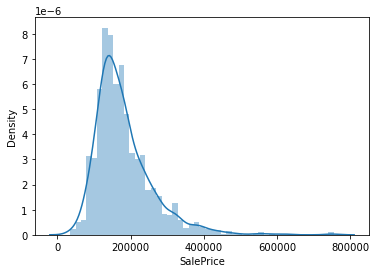

In [9]:
# Let's see the distribution of Sale price
sns.distplot(df['SalePrice'])
plt.show()


<h3>It seems there are some outliers, we need to analyze</h3>

In [10]:
df.drop('Id', axis=1, inplace=True)
print(df.shape)

(1460, 80)


In [11]:
# Column wise Null percentage
nullper = round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)
nullper

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

**Total 4 columns have more than 80% blank values, so we'll drop them**

<h3>Pandas profiling</h3>

##  Please use tabs to navigate the below pandas profiling report

In [12]:
profile_rptr =  ProfileReport(df, title="Australian market analysis", explorative=True, minimal=True)
profile_rptr.to_widgets()

<h3>Dividing columns to investigate</h3>

In [13]:
# Categorical columns
cat_cols = ["MSSubClass", "MSZoning",
            "Street",
            "Alley",
            "LotShape",
            "LandContour",
            "Utilities",
            "LotConfig",
            "LandSlope",
            "Neighborhood",
            "Condition1",
            "Condition2",
            "BldgType",
            "HouseStyle",
            "OverallQual",
            "OverallCond",
            "RoofStyle",
            "RoofMatl",
            "Exterior1st",
            "Exterior2nd",
            "MasVnrType",
            "ExterQual",
            "ExterCond",
            "Foundation",
            "BsmtQual",
            "BsmtCond",
            "BsmtExposure",
            "BsmtFinType1",
            "BsmtFinType2",
            "Heating",
            "HeatingQC",
            "CentralAir",
            "Electrical",
            "KitchenQual",
            "Functional",
            "FireplaceQu",
            "GarageType",
            "GarageFinish",
            "GarageQual",
            "GarageCond",
            "PavedDrive",
            "PoolQC",
            "Fence",
            "MiscFeature",
            "SaleType",
            "SaleCondition"]

# Need some extra investigation
explr_cols = ["BsmtFullBath",
              "BsmtHalfBath",
              "FullBath",
              "HalfBath",
              "Bedroom",
              "Kitchen",
              "TotRmsAbvGrd",
              "Fireplaces",
              "GarageCars"]

# We'll extract age from these
age_cols = ["YearBuilt",
            "YearRemodAdd",
            "GarageYrBlt",
            "YrSold"]

# Numerical Columns
num_cols = ["LotFrontage", "LotArea", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
            "LowQualFinSF", "GrLivArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "SalePrice"]



<h3>Lets plot all numeric columns</h3>

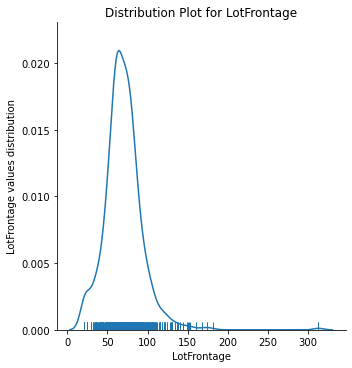

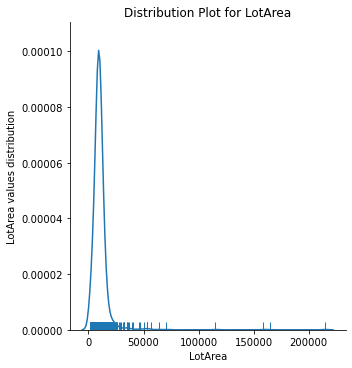

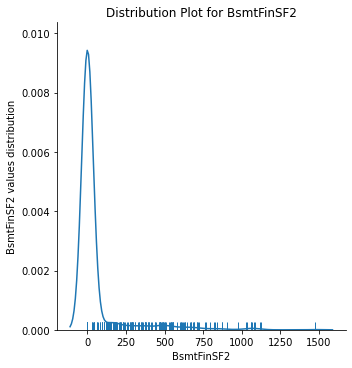

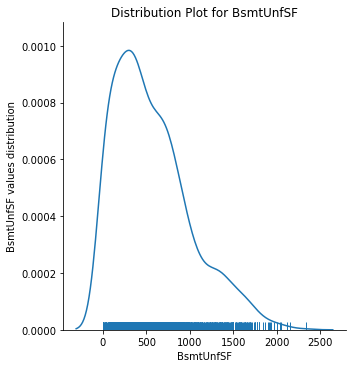

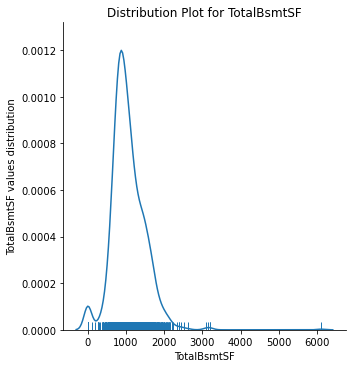

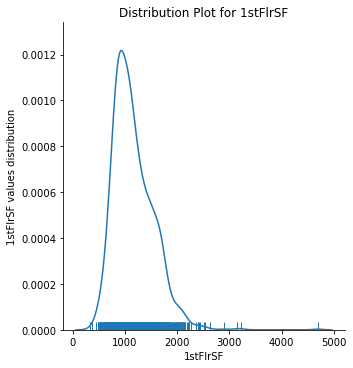

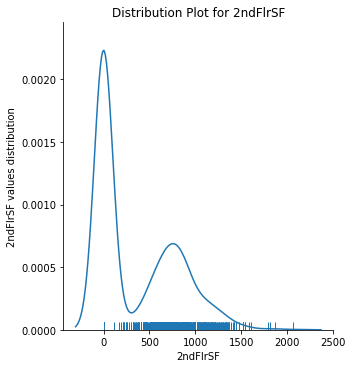

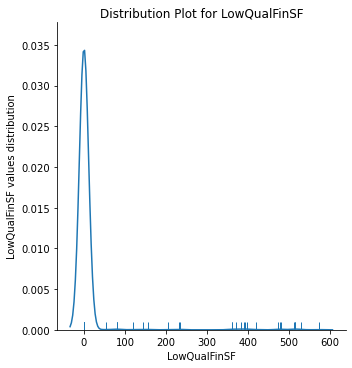

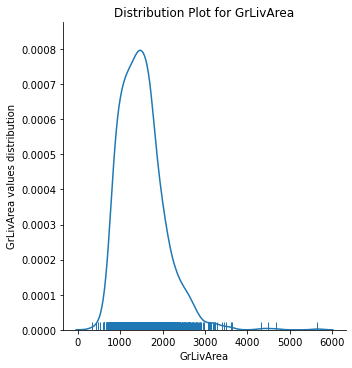

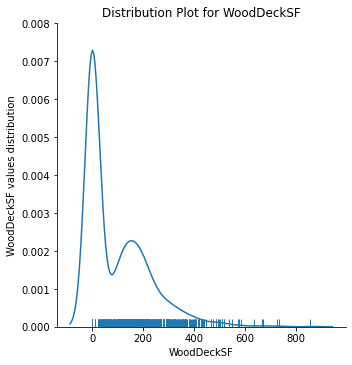

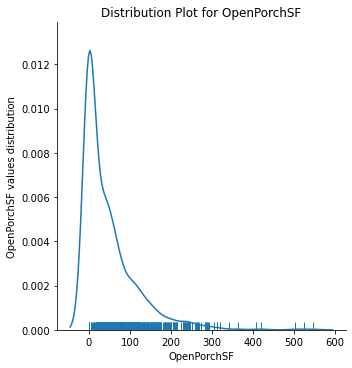

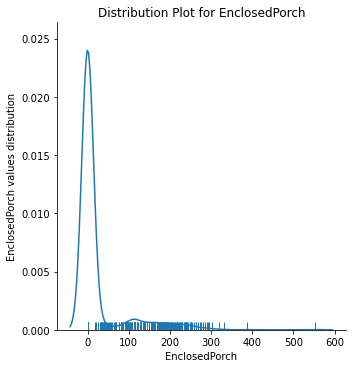

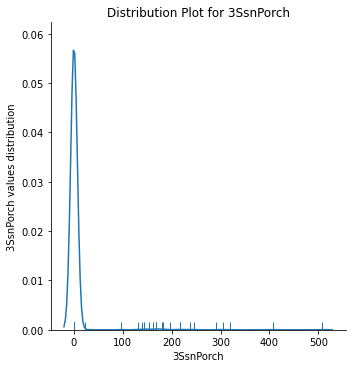

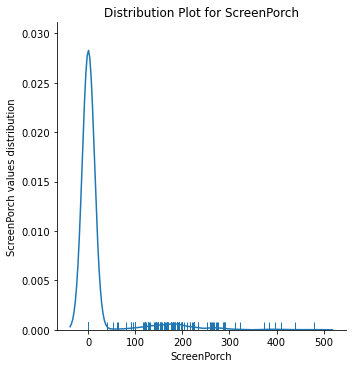

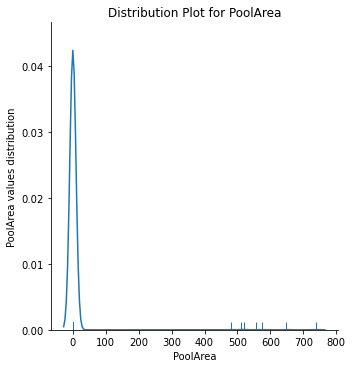

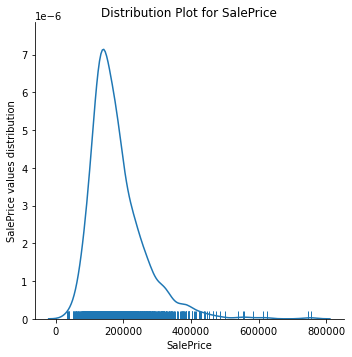

In [14]:
# Distribution plot for numerical columns
for num_col in num_cols:
    sns.displot(df, x=num_col, kind='kde', rug=True).set(title=f'Distribution Plot for {num_col}', ylabel=f'{num_col} values distribution')
    plt.show()

**Most of the columns have most values around zero**

<h3>Lets plot all categorical columns</h3>

<h2>Utility Functions</h2>

In [15]:


class GraphType(Enum):
    """Graph Type Enum

    Args:
        Enum ([type]): Built-in Enum Class
    """
    BAR = auto()
    LINE = auto()


def plot_univariate_series(
        series: pd.Series,
        title: str,
        xlabel: str,
        ylabel: str,
        graph_type: GraphType = None,
        **kwargs) -> None:
    """Bar plots a interger series

    Args:
        series (pd.Series): series to be plotted
        title (str): graph title
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        display_format (str, optional): number format. Defaults to '{0:,.0f}'.
        figsize ([type], optional): figure size. Defaults to None.
        show_count (bool, optional): show value at the top of bar. Defaults to True.
        graph_type (GraphType, optional): graph type
    """
    labels = {"x": xlabel, "y": ylabel}
    fig = None
    if graph_type is None or graph_type == GraphType.BAR:
        fig = px.bar(x=series.index, y=series, color=series.index,
                     title=title, labels=labels, **kwargs)
    if graph_type == GraphType.LINE:
        px.scatter(x=series.index, y=series, title=title, labels=labels, color=series.index,
                   **kwargs)
    fig.show()


def get_univariate_cat_plot_strs(value: str) -> Tuple[str, str, str]:
    """Creates graph title, x-axis text and y-axis text for given value

    Args:
        value (str): column name

    Returns:
        Tuple[str, str, str]: title, x-axis text and y-axis text
    """
    title_case = value.replace('_', '').title()
    count_str = title_case + ' Count'
    return count_str + ' Plot', title_case, count_str


def plot_univariate_categorical_columns(categorical_cols: Sequence[str], dataframe: pd.DataFrame, **kwargs) -> None:
    """plots categorical variable bars

    Args:
        categorical_cols (Sequence[str]): categorical columns
        dataframe (pd.DataFrame): DataFrame
    """
    for c in categorical_cols:
        value_counts_ser = dataframe[c].value_counts()
        cnt_len = len(value_counts_ser)
        if cnt_len < 16:
            t, xl, yl = get_univariate_cat_plot_strs(c)
            plot_univariate_series(value_counts_ser, t, xl, yl, **kwargs)



In [16]:
plot_univariate_categorical_columns(cat_cols, df)

In [17]:
rec_count = df.shape[0]
# Categorial columns value counts
info_db = []
value_counts_dict = {}
for col in cat_cols:
    # print(f"Value Counts for '{col}'")
    val_counts = df[col].value_counts()
    # display(val_counts)
    value_counts_dict[col] = pd.DataFrame({
        "Value": val_counts.index,
        "Count": val_counts.values,
        "Percent": round((val_counts*100)/rec_count, 2).values})
    null_count = df[col].isnull().sum()
    nulls_per = round((null_count*100)/rec_count, 2)
    info_db.append((col, len(val_counts), null_count, nulls_per))
    # print(f"Value Counts: {len(val_counts)}, Null Count: {null_count}, Null Percentage: {nulls_per}")
    # print("-"*50)

In [18]:
# Column , value count, null counts and null percent
pd.DataFrame(info_db, columns=["Column", "Value Type Count", "Null Count", "Null Percentage"]).sort_values(by=["Value Type Count", "Null Count"], ascending=False)


Column  Value Type Count  Null Count  Null Percentage
9    Neighborhood                25           0             0.00
19    Exterior2nd                16           0             0.00
0      MSSubClass                15           0             0.00
18    Exterior1st                15           0             0.00
14    OverallQual                10           0             0.00
10     Condition1                 9           0             0.00
15    OverallCond                 9           0             0.00
44       SaleType                 9           0             0.00
11     Condition2                 8           0             0.00
13     HouseStyle                 8           0             0.00
17       RoofMatl                 8           0             0.00
34     Functional                 7           0             0.00
36     GarageType                 6          81             5.55
28   BsmtFinType2                 6          38             2.60
27   BsmtFinType1                 6          37             2.53
16      RoofStyle                 6           0             0.00
23     Foundation                 6           0             0.00
29        Heating                 6           0             0.00
45  SaleCondition                 6           0             0.00
35    FireplaceQu                 5         690            47.26
38     GarageQual                 5          81             5.55
39     GarageCond                 5          81             5.55
32     Electrical                 5           1             0.07
1        MSZoning                 5           0             0.00
7       LotConfig                 5           0             0.00
12       BldgType                 5           0             0.00
22      ExterCond                 5           0             0.00
30      HeatingQC                 5           0             0.00
43    MiscFeature                 4        1406            96.30
42          Fence                 4        1179            80.75
26   BsmtExposure                 4          38             2.60
24       BsmtQual                 4          37             2.53
25       BsmtCond                 4          37             2.53
20     MasVnrType                 4           8             0.55
4        LotShape                 4           0             0.00
5     LandContour                 4           0             0.00
21      ExterQual                 4           0             0.00
33    KitchenQual                 4           0             0.00
41         PoolQC                 3        1453            99.52
37   GarageFinish                 3          81             5.55
8       LandSlope                 3           0             0.00
40     PavedDrive                 3           0             0.00
3           Alley                 2        1369            93.77
2          Street                 2           0             0.00
6       Utilities                 2           0             0.00
31     CentralAir                 2           0             0.00

In [19]:
# Value percents
for k, v in value_counts_dict.items():
    print(k)
    display(v)


MSSubClass


Value  Count  Percent
0      20    536    36.71
1      60    299    20.48
2      50    144     9.86
3     120     87     5.96
4      30     69     4.73
5     160     63     4.32
6      70     60     4.11
7      80     58     3.97
8      90     52     3.56
9     190     30     2.05
10     85     20     1.37
11     75     16     1.10
12     45     12     0.82
13    180     10     0.68
14     40      4     0.27

MSZoning


Value  Count  Percent
0       RL   1151    78.84
1       RM    218    14.93
2       FV     65     4.45
3       RH     16     1.10
4  C (all)     10     0.68

Street


Value  Count  Percent
0  Pave   1454    99.59
1  Grvl      6     0.41

Alley


Value  Count  Percent
0  Grvl     50     3.42
1  Pave     41     2.81

LotShape


Value  Count  Percent
0   Reg    925    63.36
1   IR1    484    33.15
2   IR2     41     2.81
3   IR3     10     0.68

LandContour


Value  Count  Percent
0   Lvl   1311    89.79
1   Bnk     63     4.32
2   HLS     50     3.42
3   Low     36     2.47

Utilities


Value  Count  Percent
0  AllPub   1459    99.93
1  NoSeWa      1     0.07

LotConfig


Value  Count  Percent
0   Inside   1052    72.05
1   Corner    263    18.01
2  CulDSac     94     6.44
3      FR2     47     3.22
4      FR3      4     0.27

LandSlope


Value  Count  Percent
0   Gtl   1382    94.66
1   Mod     65     4.45
2   Sev     13     0.89

Neighborhood


Value  Count  Percent
0     NAmes    225    15.41
1   CollgCr    150    10.27
2   OldTown    113     7.74
3   Edwards    100     6.85
4   Somerst     86     5.89
5   Gilbert     79     5.41
6   NridgHt     77     5.27
7    Sawyer     74     5.07
8    NWAmes     73     5.00
9   SawyerW     59     4.04
10  BrkSide     58     3.97
11  Crawfor     51     3.49
12  Mitchel     49     3.36
13  NoRidge     41     2.81
14   Timber     38     2.60
15   IDOTRR     37     2.53
16  ClearCr     28     1.92
17    SWISU     25     1.71
18  StoneBr     25     1.71
19  Blmngtn     17     1.16
20  MeadowV     17     1.16
21   BrDale     16     1.10
22  Veenker     11     0.75
23  NPkVill      9     0.62
24  Blueste      2     0.14

Condition1


Value  Count  Percent
0    Norm   1260    86.30
1   Feedr     81     5.55
2  Artery     48     3.29
3    RRAn     26     1.78
4    PosN     19     1.30
5    RRAe     11     0.75
6    PosA      8     0.55
7    RRNn      5     0.34
8    RRNe      2     0.14

Condition2


Value  Count  Percent
0    Norm   1445    98.97
1   Feedr      6     0.41
2    RRNn      2     0.14
3    PosN      2     0.14
4  Artery      2     0.14
5    RRAn      1     0.07
6    RRAe      1     0.07
7    PosA      1     0.07

BldgType


Value  Count  Percent
0    1Fam   1220    83.56
1  TwnhsE    114     7.81
2  Duplex     52     3.56
3   Twnhs     43     2.95
4  2fmCon     31     2.12

HouseStyle


Value  Count  Percent
0  1Story    726    49.73
1  2Story    445    30.48
2  1.5Fin    154    10.55
3    SLvl     65     4.45
4  SFoyer     37     2.53
5  1.5Unf     14     0.96
6  2.5Unf     11     0.75
7  2.5Fin      8     0.55

OverallQual


Value  Count  Percent
0      5    397    27.19
1      6    374    25.62
2      7    319    21.85
3      8    168    11.51
4      4    116     7.95
5      9     43     2.95
6      3     20     1.37
7     10     18     1.23
8      2      3     0.21
9      1      2     0.14

OverallCond


Value  Count  Percent
0      5    821    56.23
1      6    252    17.26
2      7    205    14.04
3      8     72     4.93
4      4     57     3.90
5      3     25     1.71
6      9     22     1.51
7      2      5     0.34
8      1      1     0.07

RoofStyle


Value  Count  Percent
0    Gable   1141    78.15
1      Hip    286    19.59
2     Flat     13     0.89
3  Gambrel     11     0.75
4  Mansard      7     0.48
5     Shed      2     0.14

RoofMatl


Value  Count  Percent
0  CompShg   1434    98.22
1  Tar&Grv     11     0.75
2  WdShngl      6     0.41
3  WdShake      5     0.34
4  Membran      1     0.07
5     Roll      1     0.07
6  ClyTile      1     0.07
7    Metal      1     0.07

Exterior1st


Value  Count  Percent
0   VinylSd    515    35.27
1   HdBoard    222    15.21
2   MetalSd    220    15.07
3   Wd Sdng    206    14.11
4   Plywood    108     7.40
5   CemntBd     61     4.18
6   BrkFace     50     3.42
7   WdShing     26     1.78
8    Stucco     25     1.71
9   AsbShng     20     1.37
10    Stone      2     0.14
11  BrkComm      2     0.14
12   CBlock      1     0.07
13  AsphShn      1     0.07
14  ImStucc      1     0.07

Exterior2nd


Value  Count  Percent
0   VinylSd    504    34.52
1   MetalSd    214    14.66
2   HdBoard    207    14.18
3   Wd Sdng    197    13.49
4   Plywood    142     9.73
5   CmentBd     60     4.11
6   Wd Shng     38     2.60
7    Stucco     26     1.78
8   BrkFace     25     1.71
9   AsbShng     20     1.37
10  ImStucc     10     0.68
11  Brk Cmn      7     0.48
12    Stone      5     0.34
13  AsphShn      3     0.21
14   CBlock      1     0.07
15    Other      1     0.07

MasVnrType


Value  Count  Percent
0     None    864    59.18
1  BrkFace    445    30.48
2    Stone    128     8.77
3   BrkCmn     15     1.03

ExterQual


Value  Count  Percent
0    TA    906    62.05
1    Gd    488    33.42
2    Ex     52     3.56
3    Fa     14     0.96

ExterCond


Value  Count  Percent
0    TA   1282    87.81
1    Gd    146    10.00
2    Fa     28     1.92
3    Ex      3     0.21
4    Po      1     0.07

Foundation


Value  Count  Percent
0   PConc    647    44.32
1  CBlock    634    43.42
2  BrkTil    146    10.00
3    Slab     24     1.64
4   Stone      6     0.41
5    Wood      3     0.21

BsmtQual


Value  Count  Percent
0    TA    649    44.45
1    Gd    618    42.33
2    Ex    121     8.29
3    Fa     35     2.40

BsmtCond


Value  Count  Percent
0    TA   1311    89.79
1    Gd     65     4.45
2    Fa     45     3.08
3    Po      2     0.14

BsmtExposure


Value  Count  Percent
0    No    953    65.27
1    Av    221    15.14
2    Gd    134     9.18
3    Mn    114     7.81

BsmtFinType1


Value  Count  Percent
0   Unf    430    29.45
1   GLQ    418    28.63
2   ALQ    220    15.07
3   BLQ    148    10.14
4   Rec    133     9.11
5   LwQ     74     5.07

BsmtFinType2


Value  Count  Percent
0   Unf   1256    86.03
1   Rec     54     3.70
2   LwQ     46     3.15
3   BLQ     33     2.26
4   ALQ     19     1.30
5   GLQ     14     0.96

Heating


Value  Count  Percent
0   GasA   1428    97.81
1   GasW     18     1.23
2   Grav      7     0.48
3   Wall      4     0.27
4   OthW      2     0.14
5  Floor      1     0.07

HeatingQC


Value  Count  Percent
0    Ex    741    50.75
1    TA    428    29.32
2    Gd    241    16.51
3    Fa     49     3.36
4    Po      1     0.07

CentralAir


Value  Count  Percent
0     Y   1365    93.49
1     N     95     6.51

Electrical


Value  Count  Percent
0  SBrkr   1334    91.37
1  FuseA     94     6.44
2  FuseF     27     1.85
3  FuseP      3     0.21
4    Mix      1     0.07

KitchenQual


Value  Count  Percent
0    TA    735    50.34
1    Gd    586    40.14
2    Ex    100     6.85
3    Fa     39     2.67

Functional


Value  Count  Percent
0   Typ   1360    93.15
1  Min2     34     2.33
2  Min1     31     2.12
3   Mod     15     1.03
4  Maj1     14     0.96
5  Maj2      5     0.34
6   Sev      1     0.07

FireplaceQu


Value  Count  Percent
0    Gd    380    26.03
1    TA    313    21.44
2    Fa     33     2.26
3    Ex     24     1.64
4    Po     20     1.37

GarageType


Value  Count  Percent
0   Attchd    870    59.59
1   Detchd    387    26.51
2  BuiltIn     88     6.03
3  Basment     19     1.30
4  CarPort      9     0.62
5   2Types      6     0.41

GarageFinish


Value  Count  Percent
0   Unf    605    41.44
1   RFn    422    28.90
2   Fin    352    24.11

GarageQual


Value  Count  Percent
0    TA   1311    89.79
1    Fa     48     3.29
2    Gd     14     0.96
3    Po      3     0.21
4    Ex      3     0.21

GarageCond


Value  Count  Percent
0    TA   1326    90.82
1    Fa     35     2.40
2    Gd      9     0.62
3    Po      7     0.48
4    Ex      2     0.14

PavedDrive


Value  Count  Percent
0     Y   1340    91.78
1     N     90     6.16
2     P     30     2.05

PoolQC


Value  Count  Percent
0    Gd      3     0.21
1    Fa      2     0.14
2    Ex      2     0.14

Fence


Value  Count  Percent
0  MnPrv    157    10.75
1  GdPrv     59     4.04
2   GdWo     54     3.70
3   MnWw     11     0.75

MiscFeature


Value  Count  Percent
0  Shed     49     3.36
1  Othr      2     0.14
2  Gar2      2     0.14
3  TenC      1     0.07

SaleType


Value  Count  Percent
0     WD   1267    86.78
1    New    122     8.36
2    COD     43     2.95
3  ConLD      9     0.62
4  ConLI      5     0.34
5  ConLw      5     0.34
6    CWD      4     0.27
7    Oth      3     0.21
8    Con      2     0.14

SaleCondition


Value  Count  Percent
0   Normal   1198    82.05
1  Partial    125     8.56
2  Abnorml    101     6.92
3   Family     20     1.37
4   Alloca     12     0.82
5  AdjLand      4     0.27

**For each categorical column if share value is less than 5% then put in other category**

In [20]:
# the below replacement_dict will be used in transformation of test set
replacement_dict = {}
for k, v in value_counts_dict.items():
    v["NewValue"] = v.apply(lambda r: r["Value"] if r["Percent"] > 5. else "Others", axis=1)
    val_dicts = {}
    for r in range(v.shape[0]):
        val_dicts[v.iloc[r]['Value']] = v.iloc[r]["NewValue"]

    replacement_dict[k] = val_dicts


In [21]:
# Replacing values
for k, v in replacement_dict.items():
    df[k] = df[k].replace(v)


In [22]:
df.sample(20)


MSSubClass MSZoning  LotFrontage  LotArea Street   Alley LotShape  \
196          20       RL         79.0     9416   Pave     NaN      Reg   
637      Others       RM         50.0     6000   Pave     NaN      Reg   
1150         20       RL         57.0     8280   Pave     NaN      IR1   
319      Others       RL          NaN    14115   Pave     NaN      Reg   
350         120       RL         68.0     7820   Pave     NaN      IR1   
768          20       RL         70.0     9100   Pave     NaN      Reg   
830          20       RL         80.0    11900   Pave     NaN      IR1   
1287         20       RL          NaN    36500   Pave     NaN      IR1   
38           20       RL         68.0     7922   Pave     NaN      Reg   
292          50       RL         60.0    11409   Pave     NaN      Reg   
24           20       RL          NaN     8246   Pave     NaN      IR1   
493          20       RL         70.0     7931   Pave     NaN      Reg   
956      Others       RM         24.0     1300   Pave     NaN      Reg   
191          60       RL          NaN     7472   Pave     NaN      IR1   
1186     Others       RL        107.0    10615   Pave     NaN      IR1   
475          20       RL         80.0     8480   Pave     NaN      Reg   
348      Others       RL         36.0     2448   Pave     NaN      Reg   
777          20       RL        100.0    13350   Pave     NaN      IR1   
709          20       RL          NaN     7162   Pave     NaN      IR1   
755      Others   Others         34.0     3230   Pave  Others      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
196          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
637          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1150         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
319          Lvl    AllPub    Inside       Gtl       Others       Norm   
350          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
768          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
830          Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1287      Others    AllPub    Inside    Others       Others       Norm   
38           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
292          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
24           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
493          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
956          Lvl    AllPub    Inside       Gtl       Others       Norm   
191          Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
1186      Others    AllPub    Corner    Others      OldTown     Others   
475          Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
348          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
777          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
709          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
755          Lvl    AllPub    Inside       Gtl      Somerst       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
196        Norm     1Fam     1Story           7           5       2007   
637        Norm   Others     1.5Fin           5      Others       1954   
1150       Norm     1Fam     1Story           6           5       1950   
319        Norm     1Fam     Others           7           5       1980   
350        Norm   TwnhsE     1Story      Others           5       2007   
768        Norm     1Fam     1Story           7           5       2004   
830        Norm     1Fam     1Story           6           5       1957   
1287       Norm     1Fam     1Story           5           5       1964   
38         Norm     1Fam     1Story           5           7       1953   
292        Norm     1Fam     1.5Fin           5      Others       1949   
24         Norm     1Fam     1Story           5      Others       1968   
493    

<h3>Imputing categorical columns</h3>

In [23]:
# Garage columns
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('NO GARAGE', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)


In [24]:
# Basement columns
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df[col].fillna('NO BASEMENT', inplace=True)


<h3>columns null check</h3>

In [25]:
round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

<h3>Lets Investigate columns wit more than 80% nulls</h3>

In [26]:
df[['PoolArea', 'PoolQC']].sample(30, random_state=997)


PoolArea PoolQC
739          0    NaN
436          0    NaN
737          0    NaN
171          0    NaN
686          0    NaN
1213         0    NaN
301          0    NaN
1123         0    NaN
2            0    NaN
924          0    NaN
180          0    NaN
341          0    NaN
1356         0    NaN
544          0    NaN
1136         0    NaN
477          0    NaN
934          0    NaN
227          0    NaN
161          0    NaN
1087         0    NaN
705          0    NaN
858          0    NaN
402          0    NaN
163          0    NaN
130          0    NaN
776          0    NaN
443          0    NaN
1227         0    NaN
206          0    NaN
281          0    NaN

In [27]:
df['PoolQC'].unique()


array([nan, 'Others'], dtype=object)

In [28]:
#  check if any PoolQC with None have some values
df[df['PoolQC'].isna()]['PoolArea'].sum()


0

**
 1. We can safely drop PoolQC, and 
 2. Alley has NA => 'No alley access', MiscFeature has NA=> None, value already so no point to impute it, same goes wit Fence and FireplaceQu
**

In [29]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', "FireplaceQu"], axis='columns')

In [30]:
df.shape

(1460, 75)

In [31]:
round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)


LotFrontage    17.74
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

<h3>We'll drop "MoSold" as well and use "YrSold" </h3>

In [32]:
df = df.drop(["MoSold"], axis='columns')


In [33]:
round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)

LotFrontage    17.74
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [34]:
# Converting year columns to age columns
for age_col in age_cols:
    df[f'{age_col}_Old'] = df[age_col].max()-df[age_col]
    df.drop(age_col, axis=1, inplace=True)


In [35]:
#  value imputation's
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['BsmtQual'].fillna('TA', inplace=True)
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('Unf', inplace=True)
df['BsmtFinType2'].fillna('Unf', inplace=True)
df['GarageType'].fillna('Attchd', inplace=True)
df['GarageYrBlt_Old'].fillna(-1, inplace=True)
df['GarageFinish'].fillna('Unf', inplace=True)
df['GarageQual'].fillna('TA', inplace=True)
df['GarageCond'].fillna('TA', inplace=True)

<h2>Outliers treatment for numeric columns</h2>

In [36]:
df[num_cols].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99]).T

count        mean        std      min        5%       10%  \
LotFrontage    1201.0      70.050     24.285     21.0     34.00      44.0   
LotArea        1460.0   10516.828   9981.265   1300.0   3311.70    5000.0   
BsmtFinSF2     1460.0      46.549    161.319      0.0      0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0      0.00      74.9   
TotalBsmtSF    1460.0    1057.429    438.705      0.0    519.30     636.9   
1stFlrSF       1460.0    1162.627    386.588    334.0    672.95     756.9   
2ndFlrSF       1460.0     346.992    436.528      0.0      0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0      0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    848.00     912.0   
WoodDeckSF     1460.0      94.245    125.339      0.0      0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0      0.00       0.0   
EnclosedPorch  1460.0      21.954     61.119      0.0      0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0      0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0      0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0      0.00       0.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  88000.00  106475.0   

                     25%       50%        75%        95%        99%       max  
LotFrontage        59.00      69.0      80.00     107.00     141.00     313.0  
LotArea          7553.50    9478.5   11601.50   17401.15   37567.64  215245.0  
BsmtFinSF2          0.00       0.0       0.00     396.20     830.38    1474.0  
BsmtUnfSF         223.00     477.5     808.00    1468.00    1797.05    2336.0  
TotalBsmtSF       795.75     991.5    1298.25    1753.00    2155.05    6110.0  
1stFlrSF          882.00    1087.0    1391.25    1831.25    2219.46    4692.0  
2ndFlrSF            0.00       0.0     728.00    1141.05    1418.92    2065.0  
LowQualFinSF        0.00       0.0       0.00       0.00     360.00     572.0  
GrLivArea        1129.50    1464.0    1776.75    2466.10    3123.48    5642.0  
WoodDeckSF          0.00       0.0     168.00     335.00     505.46     857.0  
OpenPorchSF         0.00      25.0      68.00     175.05     285.82     547.0  
EnclosedPorch       0.00       0.0       0.00     180.15     261.05     552.0  
3SsnPorch           0.00       0.0       0.00       0.00     168.00     508.0  
ScreenPorch         0.00       0.0       0.00     160.00     268.05     480.0  
PoolArea            0.00       0.0       0.00       0.00       0.00     738.0  
SalePrice      129975.00  163000.0  214000.00  326100.00  442567.01  755000.0

**It seems few columns have outliers**

In [37]:

# Removing outliers


def remove_outlier_data(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x = x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x


df = remove_outlier_data(df)


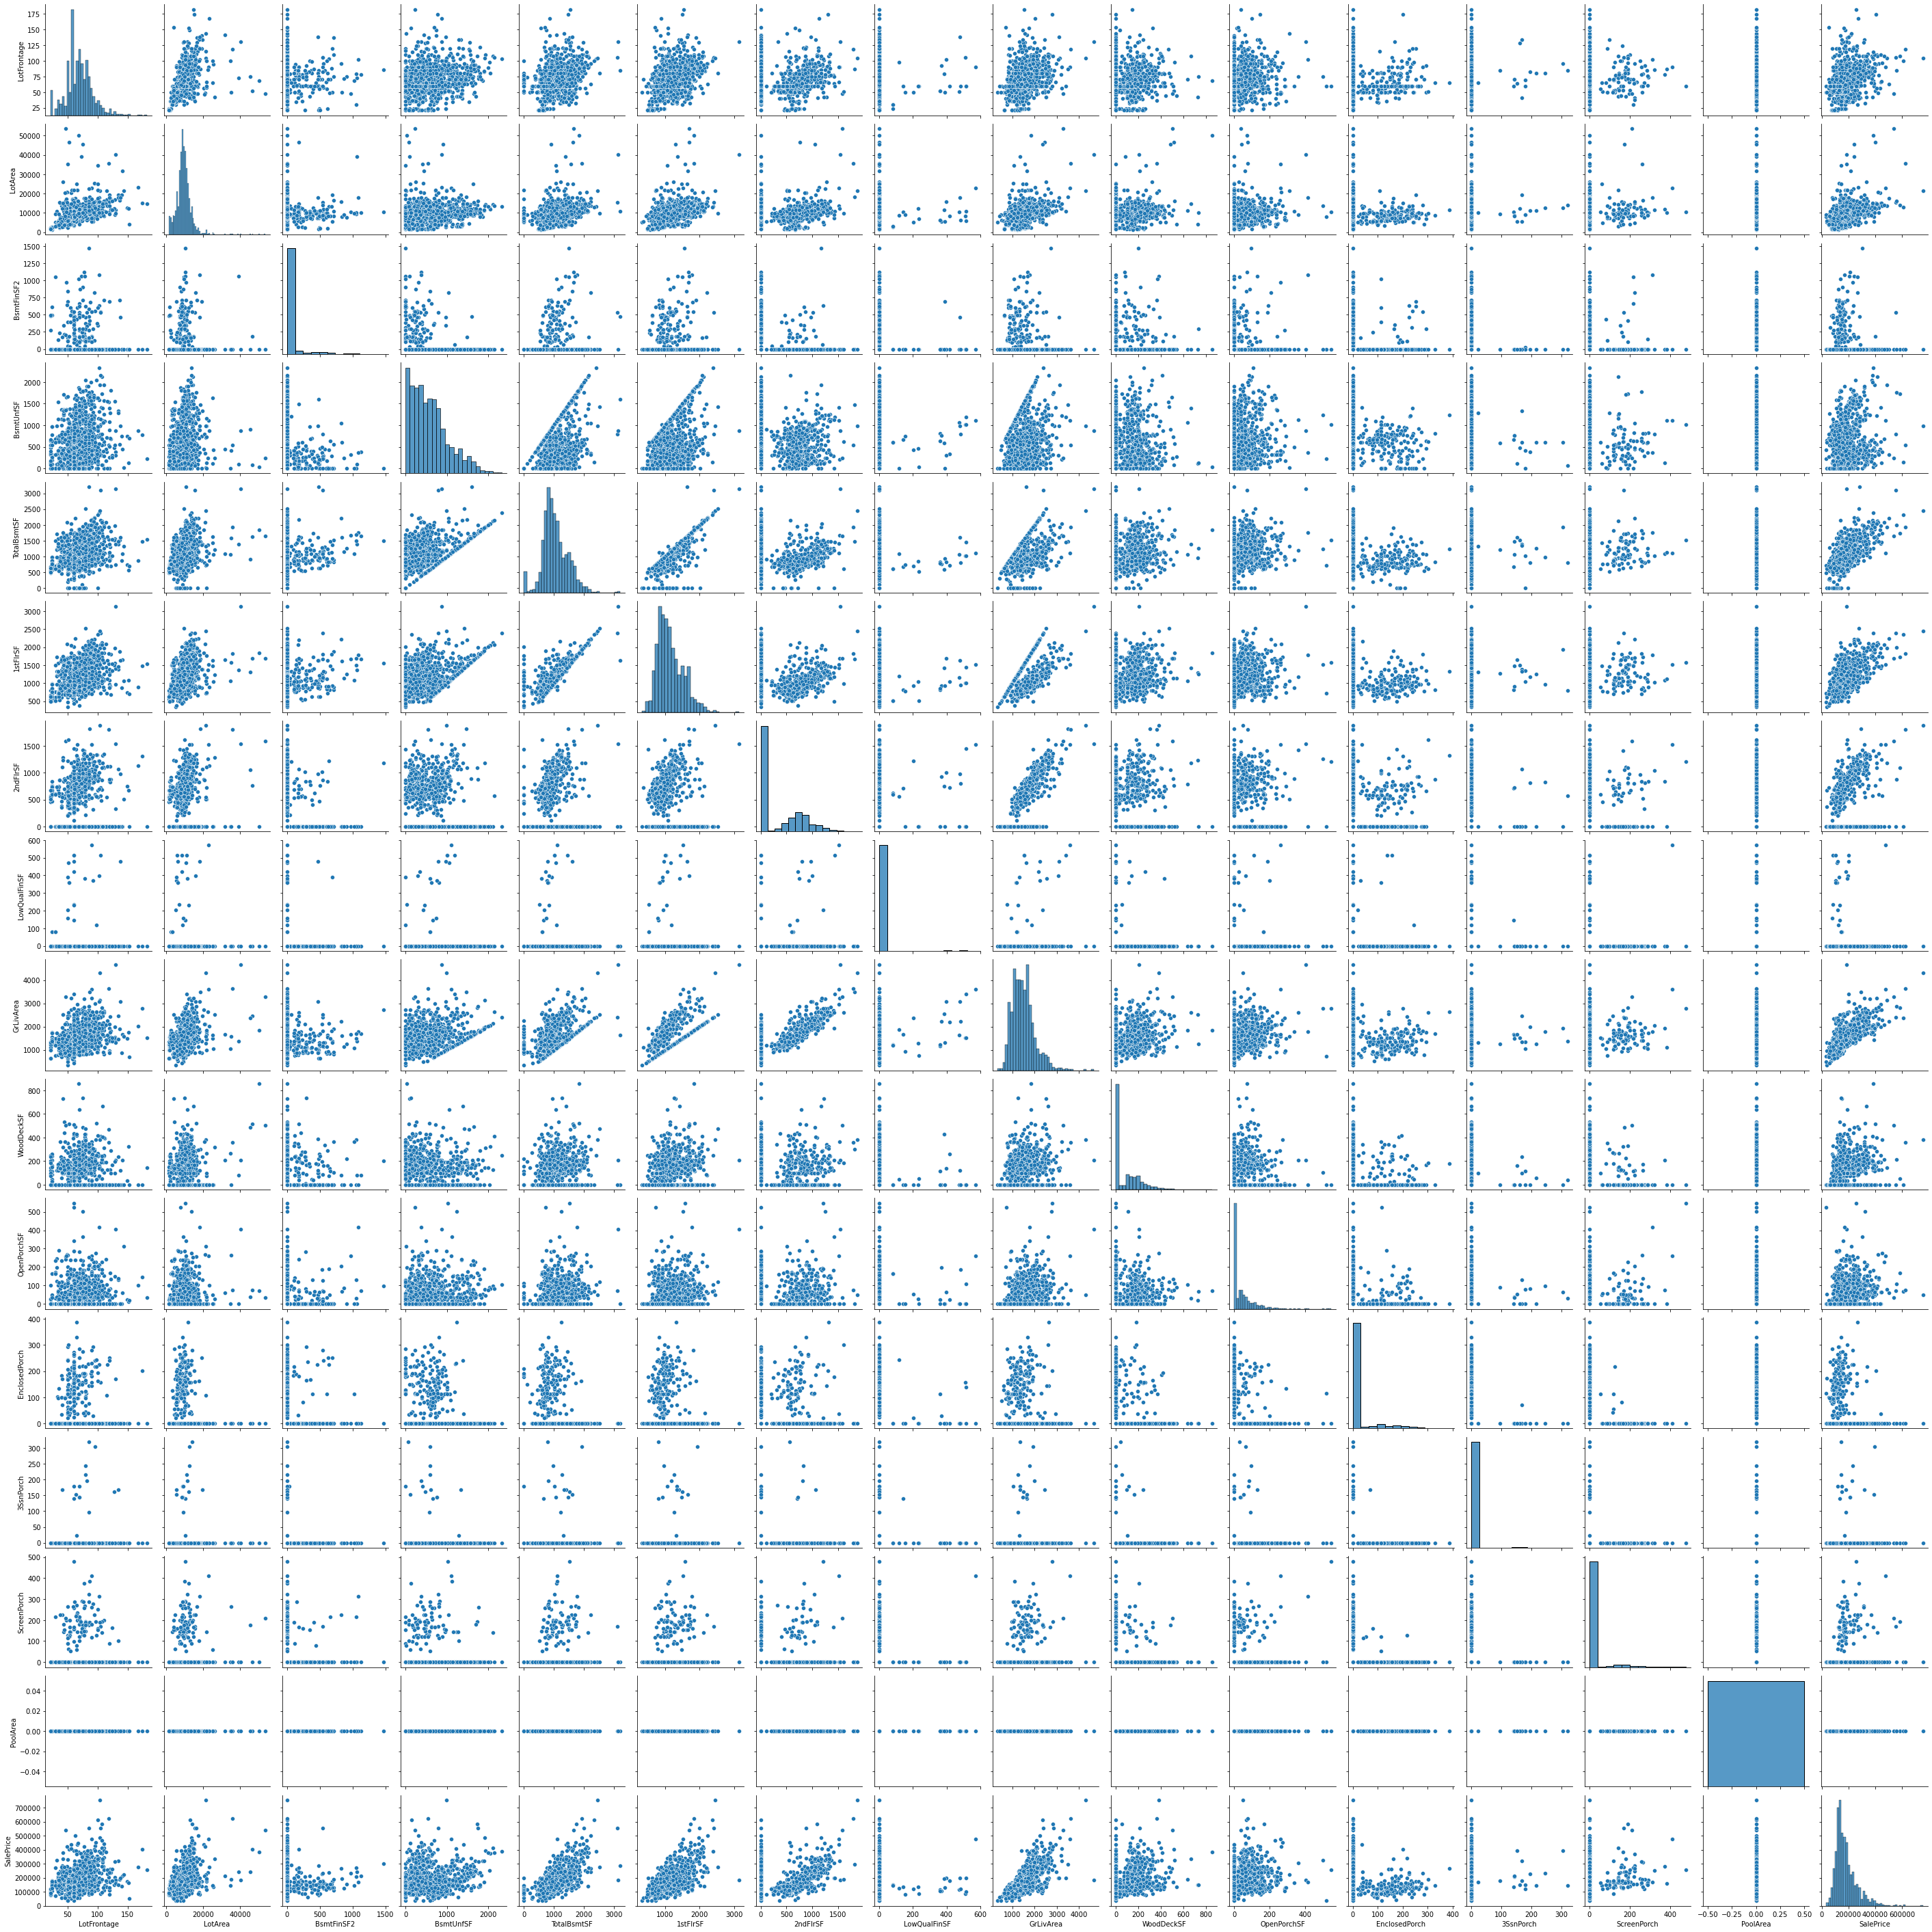

In [38]:
#  pairplot
sns.pairplot(df[num_cols])
plt.show()


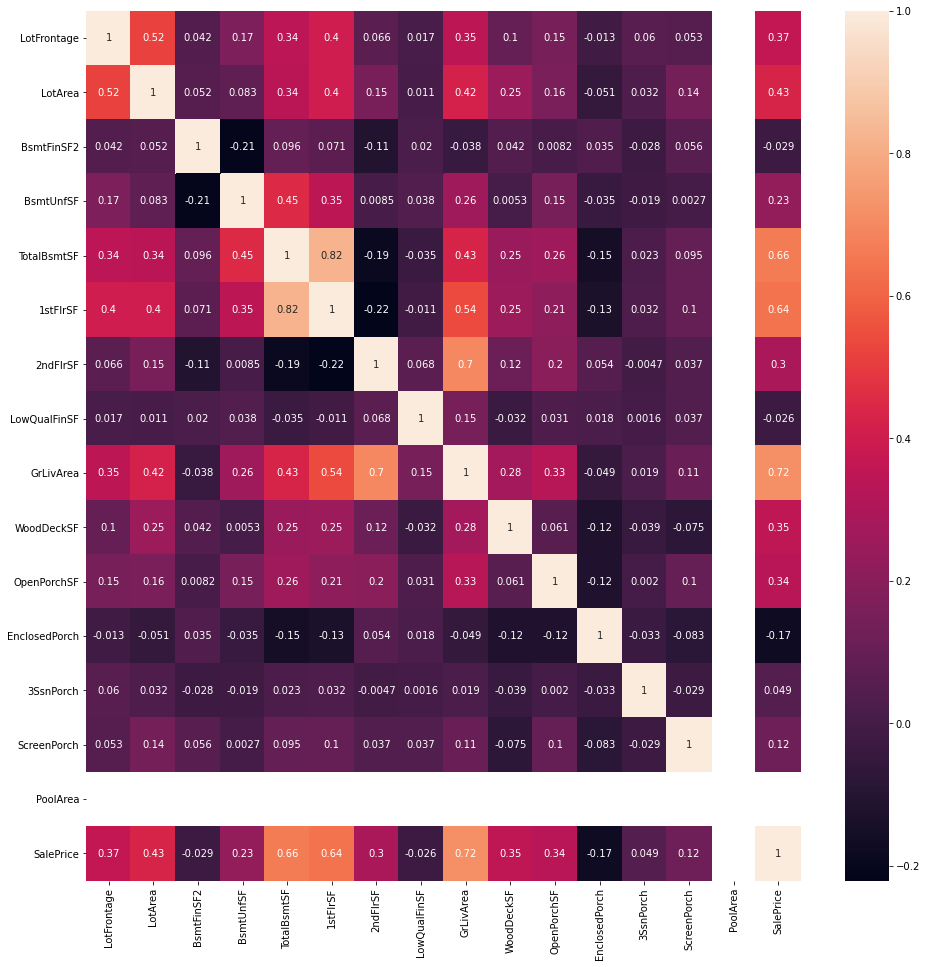

In [39]:
# Correlation plot
plt.figure(figsize=(16, 16))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()


<h2>Lets Get dummies for categorical columns</h2>

In [40]:
# Need to do because we have dropped many categorical columns

cat_cols = list(set(cat_cols).intersection(set(df.columns)))


In [41]:
dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop(cat_cols, axis=1)


In [42]:
list(df.columns)

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'YearBuilt_Old',
 'YearRemodAdd_Old',
 'GarageYrBlt_Old',
 'YrSold_Old',
 'Condition2_Others',
 'LotShape_Others',
 'LotShape_Reg',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'HouseStyle_Others',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LotConfig_Others',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Others',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'MasVnrType_Others',
 'MasVnrType_Stone',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_NO BASEMENT',
 'BsmtFinType1_Rec',
 'BsmtFi

In [43]:
df.shape

(1190, 141)

In [44]:
df.sample(10)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
199          76.0     9591       262.0        1088           0        625   
1325         40.0     3636         0.0           0           0        796   
1302         92.0    10120       391.0         740           0        425   
1267         89.0    13214         0.0           0           0       2002   
570          74.0    13101       108.0         231           0       1497   
492         105.0    15578         0.0           0           0        728   
820          72.0     7226         0.0           0           0        798   
990          82.0     9452       423.0        1074           0        322   
1166         64.0    10475        72.0           0           0       1694   
334          59.0     9042         0.0         828           0        115   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
199          1713      1713         0             0       1713             1   
1325          796       796         0             0        796             0   
1302         1165      1203      1323             0       2526             1   
1267         2002      2018         0             0       2018             0   
570          1728      1728         0             0       1728             0   
492           728       728       728             0       1456             0   
820           798       798       842             0       1640             0   
990          1396      1407       985             0       2392             1   
1166         1694      1694         0             0       1694             0   
334           943       943       695             0       1638             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
199              0         2         0             3             1   
1325             0         1         0             2             1   
1302             0         2         1             4             1   
1267             0         2         0             3             1   
570              0         2         0             6             2   
492              0         2         1             3             1   
820              0         2         1             3             1   
990              0         2         1             3             1   
1166             0         2         0             3             1   
334              0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
199              7           1           3         856           0   
1325             5           0           0           0           0   
1302             8           1           3         844         309   
1267            10           1           3         746         144   
570             10           0           2         576           0   
492              8           0           2         429           0   
820              6           0           2         595           0   
990              7           1           3         870           0   
1166             7           0           3         776         160   
334              7           2           2         472         100   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
199            26              0          0          170         0        0   
1325            0            100          0            0         0        0   
1302           78              0          0            0         0        0   
1267           76              0          0            0         0        0   
570             0              0          0            0         0        0   
492             0              0          0            0         0        0   
820            45              0          0            0         0        0   
990            70              0          0            0         0        0   
1166           33       

<h2>Split the data</h2>

In [45]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)


In [46]:
num_col = list(set(num_cols).intersection(set(df.columns)))

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])


<h3>Lets validate the distribution of target column in train and test</h3>

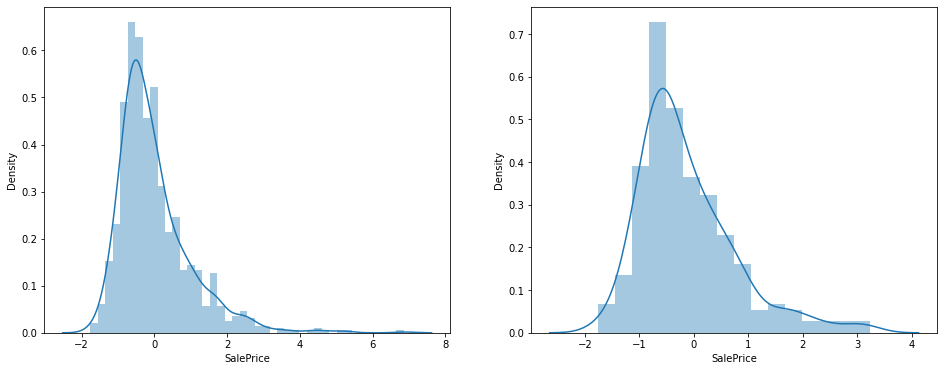

In [47]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.distplot(df_train['SalePrice'])
plt.subplot(122)
sns.distplot(df_test['SalePrice'])
plt.show()


<h3>Extract Target column</h3>

In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test


<h3>I am going to use RFECV for automatic  feature elemination</h3>

In [49]:


def feature_selector(feature_selector_obj, train_data: pd.DataFrame, train_target: pd.DataFrame):
    selector = feature_selector_obj.fit(train_data, train_target)
    display(selector.support_)
    print(f"Total selected features: {selector.support_.sum()}")
    print(
        f"Selected feature Names: {list(train_data.columns[selector.support_])}")
    display(selector.ranking_)
    return selector



In [50]:
# get RFECV selector
rfe_selector = feature_selector(RFECV(LinearRegression(), step=1, cv=5), X_train, y_train)

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,

Total selected features: 44
Selected feature Names: ['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'GarageCars', 'Condition2_Others', 'LotShape_Others', 'LotConfig_CulDSac', 'Exterior2nd_Plywood', 'MasVnrType_Others', 'BsmtFinType1_NO BASEMENT', 'KitchenQual_Gd', 'KitchenQual_Others', 'KitchenQual_TA', 'BsmtQual_Gd', 'BsmtQual_NO BASEMENT', 'BsmtQual_Others', 'BsmtQual_TA', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Heating_Others', 'SaleCondition_Normal', 'SaleCondition_Partial', 'Street_Pave', 'Condition1_Others', 'BldgType_Others', 'BldgType_TwnhsE', 'MSZoning_RL', 'MSZoning_RM', 'ExterQual_Others', 'Functional_Typ', 'SaleType_Others', 'SaleType_WD', 'RoofMatl_Others', 'BsmtExposure_Gd', 'OverallQual_7.0', 'OverallQual_8.0', 'OverallQual_Others', 'BsmtFinType2_Others', 'BsmtFinType2_Unf', 'RoofStyle_Others', 'GarageCond_Others']


array([62, 37, 92, 93, 76,  1,  1,  1,  1, 13,  5, 40, 41, 18, 43, 38,  1,
       54, 23,  1, 95, 65, 56, 94, 75, 50, 97, 96, 87, 86, 89, 91,  1,  1,
       71, 78, 58, 83,  1, 73, 29, 21,  4,  1, 46, 44, 70,  1, 80, 59, 30,
        6,  1, 52, 90, 88, 63,  3,  9,  1,  1,  1, 68,  1,  1,  1,  1, 33,
        1, 32, 64,  1, 31,  2, 49,  1,  1,  1, 25,  1, 74, 85, 11, 79, 84,
        1, 28, 26, 27, 51,  1, 48, 14, 45,  1,  1,  1,  1,  1, 55, 77, 81,
       35, 22,  1,  1,  1,  1, 20, 15, 66, 47, 36, 34, 57, 10, 24,  1, 17,
       19, 16, 60, 42, 69, 53, 39, 82,  1,  1,  1,  1,  1, 72,  1, 67, 61,
       12,  7,  1,  8])

In [51]:
# get only usefull columns from train and test
rfe_sel_columns = list(X_train.columns[rfe_selector.support_])
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]


<h3>Lets try lasso</h3>

In [52]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8800120180079687
0.8924876502267711


In [53]:

# print Lasso coefficients
model_parameter = list(lasso.coef_)
model_parameter.insert(0, lasso.intercept_)
model_parameter = [round(x, 3) for x in model_parameter]
col = df_train.columns
col.insert(0, 'Constant')
list(zip(col, model_parameter))


[('LotFrontage', -0.097),
 ('LotArea', -0.118),
 ('MasVnrArea', 0.223),
 ('BsmtFinSF1', 0.282),
 ('BsmtFinSF2', 0.345),
 ('BsmtUnfSF', -0.283),
 ('TotalBsmtSF', 0.126),
 ('1stFlrSF', -0.362),
 ('2ndFlrSF', 0.179),
 ('LowQualFinSF', 0.21),
 ('GrLivArea', -0.081),
 ('BsmtFullBath', -0.016),
 ('BsmtHalfBath', -0.0),
 ('FullBath', -0.252),
 ('HalfBath', -0.378),
 ('BedroomAbvGr', -0.373),
 ('KitchenAbvGr', -0.178),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', -0.237),
 ('GarageCars', -0.286),
 ('GarageArea', -0.14),
 ('WoodDeckSF', 0.194),
 ('OpenPorchSF', 0.167),
 ('EnclosedPorch', -0.259),
 ('3SsnPorch', 0.14),
 ('ScreenPorch', 0.173),
 ('PoolArea', 0.294),
 ('MiscVal', -0.127),
 ('YearBuilt_Old', -0.111),
 ('YearRemodAdd_Old', -0.086),
 ('GarageYrBlt_Old', 0.123),
 ('YrSold_Old', 0.026),
 ('Condition2_Others', 0.188),
 ('LotShape_Others', 0.201),
 ('LotShape_Reg', -0.216),
 ('HouseStyle_1Story', -0.196),
 ('HouseStyle_2Story', 0.093),
 ('HouseStyle_Others', 0.251),
 ('LotConfig_CulDSac', 0.

<h3>Lets used Grid Search CV for Lasso to get best model</h3>

In [54]:
#  Grid search CV for Lasso
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}
folds = KFold(n_splits=10, shuffle=True, random_state=42)
cv_model = GridSearchCV(estimator=lasso, param_grid=params, scoring='r2',
                        cv=folds, return_train_score=True, verbose=1)
cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
cv_result = pd.DataFrame(cv_model.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0          0.008     1.921e-03            0.002       6.710e-04        0.001   
1          0.003     4.892e-04            0.002       4.585e-04        0.010   
2          0.004     9.167e-04            0.002       7.811e-04        0.100   
3          0.003     8.713e-04            0.002       7.485e-04        1.000   
4          0.003     8.311e-04            0.002       7.490e-04        5.000   
5          0.004     1.072e-03            0.002       4.913e-04       10.000   
6          0.003     1.004e-03            0.002       6.626e-04       20.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}              0.875              0.899              0.905   
1   {'alpha': 0.01}              0.804              0.879              0.875   
2    {'alpha': 0.1}              0.656              0.726              0.778   
3    {'alpha': 1.0}             -0.014             -0.005             -0.039   
4    {'alpha': 5.0}             -0.014             -0.005             -0.039   
5   {'alpha': 10.0}             -0.014             -0.005             -0.039   
6   {'alpha': 20.0}             -0.014             -0.005             -0.039   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0              0.898              0.651              0.867              0.891   
1              0.854              0.631              0.825              0.859   
2              0.658              0.557              0.678              0.716   
3             -0.088             -0.066             -0.007             -0.002   
4             -0.088             -0.066             -0.007             -0.002   
5             -0.088             -0.066             -0.007             -0.002   
6             -0.088             -0.066             -0.007             -0.002   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0              0.892              0.885              0.849            0.861   
1              0.870              0.845              0.842            0.828   
2              0.728              0.669              0.701            0.687   
3             -0.023             -0.026             -0.020           -0.029   
4             -0.023             -0.026             -0.020           -0.029   
5             -0.023             -0.026             -0.020           -0.029   
6             -0.023             -0.026             -0.020           -0.029   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0           0.072                1               0.880               0.878   
1           0.069                2               0.845               0.838   
2           0.056                3               0.703               0.692   
3           0.027                4               0.000               0.000   
4           0.027                4               0.000               0.000   
5           0.027                4               0.000               0.000   
6           0.027                4               0.000               0.000   

   split2_train_score  split3_train_score  split4_train_score  \
0               0.877               0.879               0.906   
1               0.841               0.842               0.870   
2               0.690               0.702               0.718   
3               0.000               0.000               0.000   
4               0.000               0.000               0.000   
5               0.000               0.000               0.000   
6               0.000               0.000               0.000   

   split5_train_score  split6_train_score  split7_train_score  \
0               0.881               0.878               0.879   
1               0.843               0.841               0.840   
2               0.699               0.694               0.693   
3               0.000            

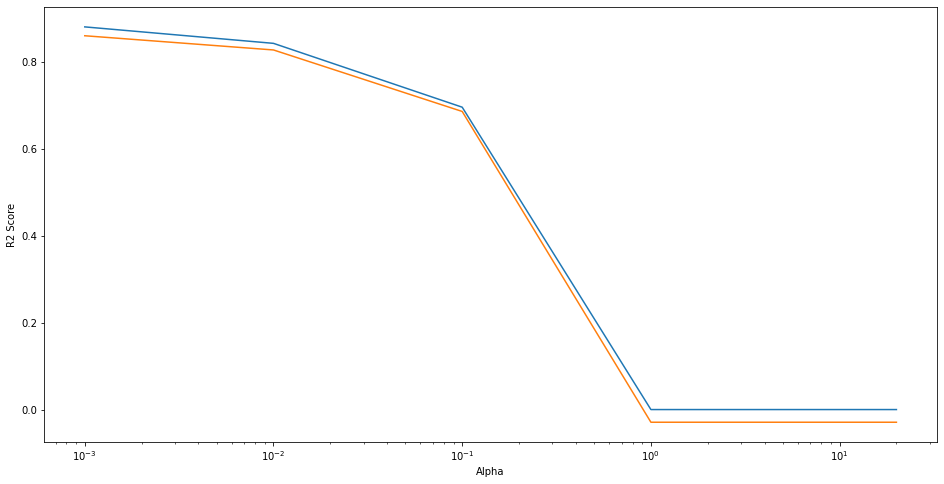

In [56]:
#  plotting train and test errors
plt.figure(figsize=(16, 8))
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()


In [57]:
# best alpha
cv_model.best_params_


{'alpha': 0.001}

In [58]:
#  train model with best alpha

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8800120180079687
0.8924876502267711


In [59]:
#  find lasso params
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature Name', 'Coefficient Value']

<h2>Best (TOP 15) Lasso params</h2>

In [60]:
lasso_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()


<h2>Ridge Regression</h2>

In [61]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test, y_test_pred))


0.8819271573299177
0.8865011496211137


Good R-square values

In [62]:
#  Grid search CV for Ridge
ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}
folds = KFold(n_splits=10, shuffle=True, random_state=42)
cv_model = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2',
                        cv=folds, return_train_score=True, verbose=1)
cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
r_cv_result = pd.DataFrame(cv_model.cv_results_)
r_cv_result['param_alpha'] = r_cv_result['param_alpha'].astype('float32')
r_cv_result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0          0.003     9.431e-04            0.002       3.999e-04        0.001   
1          0.004     8.718e-04            0.002       5.385e-04        0.010   
2          0.004     1.000e-03            0.002       6.402e-04        0.100   
3          0.004     8.294e-04            0.002       1.078e-03        1.000   
4          0.004     7.810e-04            0.002       7.487e-04        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}              0.869              0.894              0.903   
1   {'alpha': 0.01}              0.869              0.894              0.903   
2    {'alpha': 0.1}              0.869              0.894              0.903   
3    {'alpha': 1.0}              0.872              0.897              0.907   
4    {'alpha': 5.0}              0.875              0.902              0.912   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0              0.894              0.657              0.857              0.897   
1              0.894              0.657              0.858              0.897   
2              0.894              0.658              0.860              0.896   
3              0.896              0.660              0.867              0.895   
4              0.899              0.666              0.867              0.891   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0              0.891              0.889              0.849            0.860   
1              0.891              0.889              0.849            0.860   
2              0.891              0.889              0.849            0.860   
3              0.891              0.888              0.851            0.862   
4              0.893              0.885              0.853            0.864   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0           0.070                7               0.882               0.880   
1           0.070                6               0.882               0.880   
2           0.070                4               0.882               0.880   
3           0.069                3               0.882               0.879   
4           0.068                1               0.880               0.877   

   split2_train_score  split3_train_score  split4_train_score  \
0               0.879               0.881               0.908   
1               0.879               0.881               0.908   
2               0.879               0.881               0.908   
3               0.878               0.880               0.908   
4               0.876               0.878               0.906   

   split5_train_score  split6_train_score  split7_train_score  \
0               0.883               0.879               0.880   
1               0.883               0.879               0.880   
2               0.883               0.879               0.880   
3               0.882               0.879               0.880   
4               0.880               0.877               0.878   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0               0.878               0.884             0.883            0.008  
1               0.878               0.884             0.883            0.008  
2               0.878               0.884             0.883            0.008  
3               0.877               0.884             0.883            0.008  
4               0.875               0.882             0.881            0.009

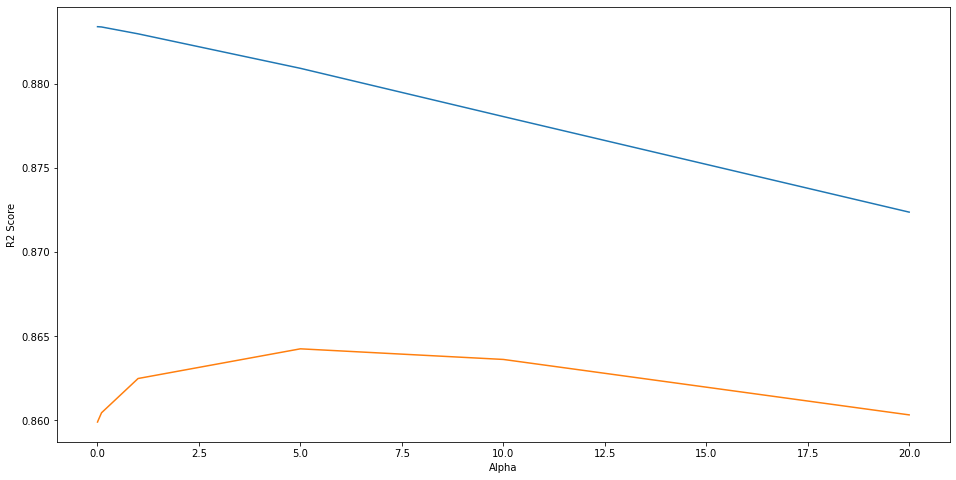

In [64]:
#  plotting train and test errors
plt.figure(figsize=(16, 8))
plt.plot(r_cv_result['param_alpha'], r_cv_result['mean_train_score'])
plt.plot(r_cv_result['param_alpha'], r_cv_result['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()


In [65]:
# best alpha
cv_model.best_params_


{'alpha': 5.0}

In [66]:
#  train model with best alpha

ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8723025646883729
0.8967489878189895


In [67]:
#  find ridge params
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature Name', 'Coefficient Value']

<h2>Best (TOP 15) Ridge params</h2>

In [68]:
ridge_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()


<h4>We can see that R-Squared are almost same (little better in ridge 0.903 > 0.899) but Lasso has advantage of being simpler model. So here I am going to choose <b>Lasso</b> over Ridge</h4>

<h4>Model for this analysis</h4>

In [69]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8800120180079687
0.8924876502267711


<h2>With doubling of alpha</h2>

With Lasso

In [70]:
#  train model with best alpha

lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8767183275628921
0.89400836631713


In [71]:
#  find lasso params
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature Name', 'Coefficient Value']

In [72]:
lasso_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()

With Ridge 

In [73]:

ridge = Ridge(alpha=40.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8630424530402101
0.8930445759034429


In [74]:
#  find ridge params
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature Name', 'Coefficient Value']


In [75]:
ridge_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()


## Remove Top 5 features and then get top parameter

**For Lasso**

In [76]:
top_lasso_featutes = ["YrSold_Old", "LowQualFinSF", "GarageCond_Others", "GarageYrBlt_Old", "Exterior1st_Others"]

X_train_dropped = X_train.drop(top_lasso_featutes, axis=1)
X_test_dropped = X_test.drop(top_lasso_featutes, axis=1)

KeyError: "['YrSold_Old' 'LowQualFinSF' 'GarageYrBlt_Old' 'Exterior1st_Others'] not found in axis"

In [ ]:
#  train model with best alpha

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

y_train_pred = lasso.predict(X_train_dropped)
y_test_pred = lasso.predict(X_test_dropped)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


In [ ]:
#  find lasso params
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train_dropped.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature Name', 'Coefficient Value']

In [ ]:
lasso_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()

**For Ridge**

In [ ]:
top_ridge_featutes = ["YrSold_Old", "BsmtUnfSF", "LowQualFinSF", "GarageQual_Others", "Neighborhood_NridgHt"]
X_train_dropped = X_train.drop(top_ridge_featutes, axis=1)
X_test_dropped = X_test.drop(top_ridge_featutes, axis=1)

In [ ]:

ridge = Ridge(alpha=20.0)
ridge.fit(X_train_dropped, y_train)

y_train_pred = ridge.predict(X_train_dropped)
y_test_pred = ridge.predict(X_test_dropped)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


In [ ]:
#  find ridge params
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = X_train_dropped.columns
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature Name', 'Coefficient Value']


In [ ]:
ridge_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()
